## Import Library

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [30]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [31]:
# rename the Annual Income (k$)	Spending Score (1-100) column
df = df.rename(columns={"Luas Tanah (m2)": "Luas Tanah", "Luas Bangunan (m2)": "Luas Bangunan", 
                        "Harga Penawaran (dari Owner)":"Harga Penawaran", 
                        "Lebar Jalan Depan Rumah (ROW)":"Lebar Jalan Depan Rumah",
                        "Tingkat/Lantai ": "Tingkat/Lantai"})
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [32]:
# describe data
df.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [33]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area Category            308 non-null    object
 1   Nama Daerah              308 non-null    object
 2   Luas Tanah               308 non-null    int64 
 3   Luas Bangunan            308 non-null    int64 
 4   Jumlah Kamar             308 non-null    int64 
 5   Jumlah Kamar Mandi       308 non-null    int64 
 6   Tingkat/Lantai           308 non-null    int64 
 7   Harga Penawaran          308 non-null    int64 
 8   Terjual/Belum            308 non-null    object
 9   Arah Hadap Rumah         308 non-null    object
 10  Posisi Rumah             308 non-null    object
 11  Lebar Jalan Depan Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


## Data Transformation

In [34]:
# Encoding Gender
le = LabelEncoder()
df['Area Category'] = le.fit_transform(df['Area Category'])
df['Nama Daerah'] = le.fit_transform(df['Nama Daerah'])
df['Terjual/Belum'] = le.fit_transform(df['Terjual/Belum'])
df['Arah Hadap Rumah'] = le.fit_transform(df['Arah Hadap Rumah'])
df['Posisi Rumah'] = le.fit_transform(df['Posisi Rumah'])
df['Lebar Jalan Depan Rumah'] = le.fit_transform(df['Lebar Jalan Depan Rumah'])
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah
0,3,11,240,300,4,3,2,3500000000,0,3,2,0
1,0,100,30,60,2,1,2,287799000,0,3,2,1
2,3,48,170,170,5,4,2,2699999999,0,1,0,0
3,2,48,187,250,5,5,2,3100000000,0,3,2,0
4,1,48,350,600,5,5,2,5000000000,0,0,2,0


In [35]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 
                                'Jumlah Kamar Mandi', 'Tingkat/Lantai','Harga Penawaran']])

df_scaled = pd.DataFrame(df_scaled, columns=['Luas Tanah', 'Luas Bangunan', 'Jumlah Kamar', 
                                'Jumlah Kamar Mandi', 'Tingkat/Lantai', 'Harga Penawaran'])
df_scaled.head()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723


In [36]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01


## Silhouette Score

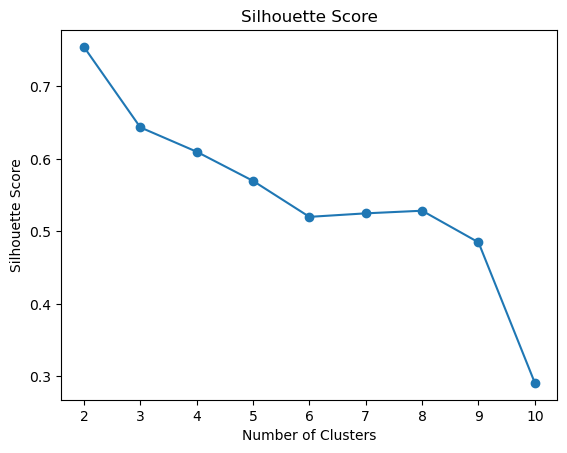

In [37]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

## Comparing Silhouette Score to get best combination of linkage and metric

Skipping Ward linkage with Manhattan metric (not supported).


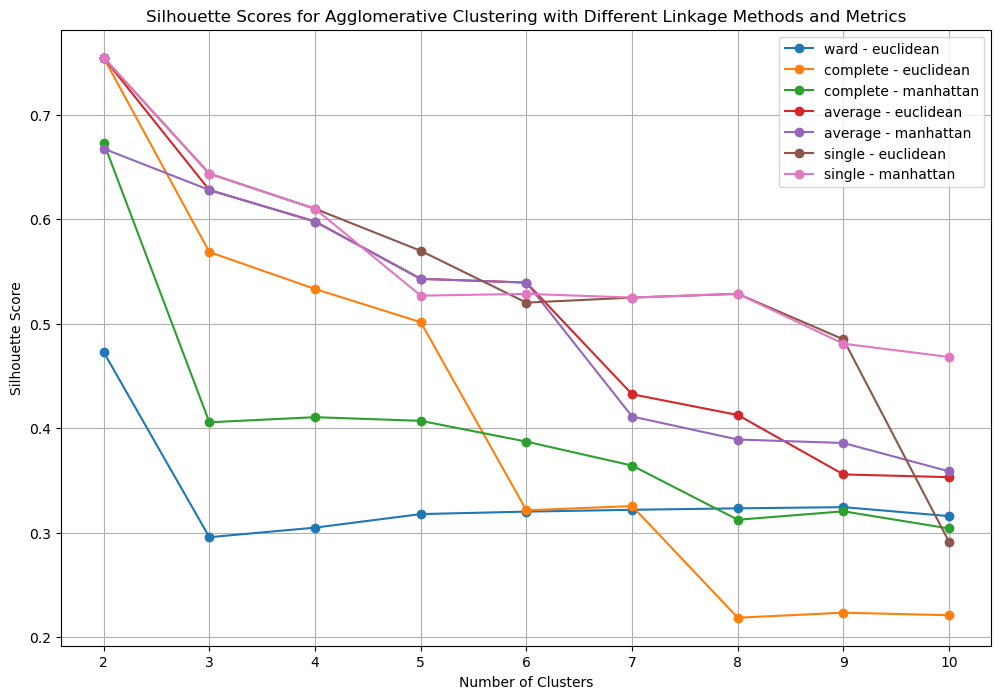

Best Silhouette Score: 0.7543687625770334
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [38]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

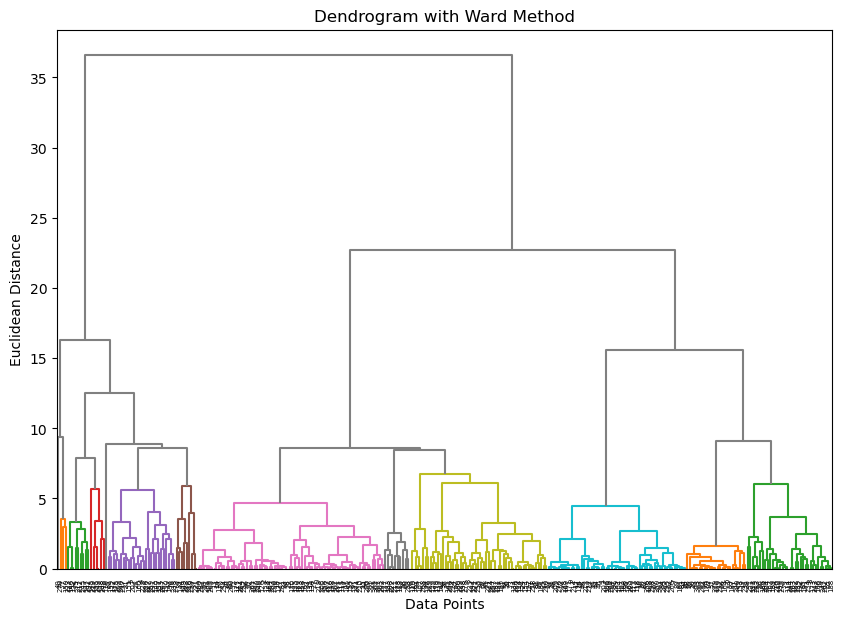

In [39]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

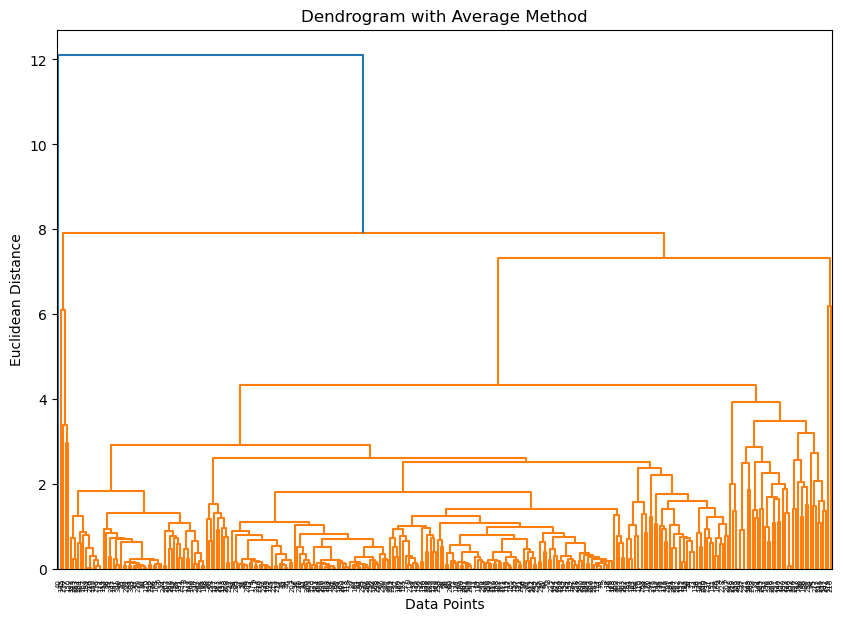

In [43]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [44]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_scaled)

In [45]:
# Evaluation
ss = silhouette_score(df_scaled, y_hc)
print(ss)

0.7543687625770334


## Dendogram Visualization for Hierarchical Clustering Model

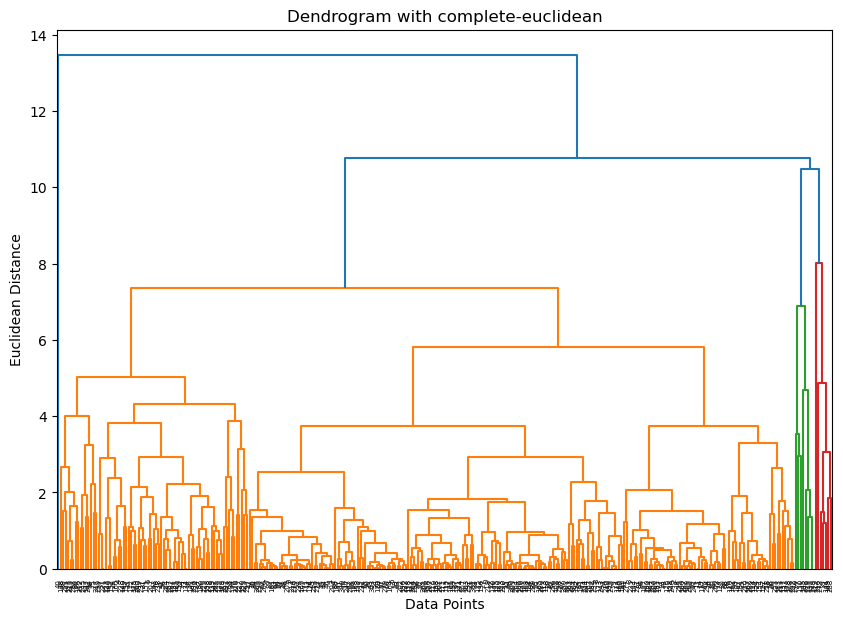

In [46]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [47]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah,Luas Bangunan,Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran,Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah,Agglo
0,3,11,240,300,4,3,2,3500000000,0,3,2,0,0
1,0,100,30,60,2,1,2,287799000,0,3,2,1,0
2,3,48,170,170,5,4,2,2699999999,0,1,0,0,0
3,2,48,187,250,5,5,2,3100000000,0,3,2,0,0
4,1,48,350,600,5,5,2,5000000000,0,0,2,0,0


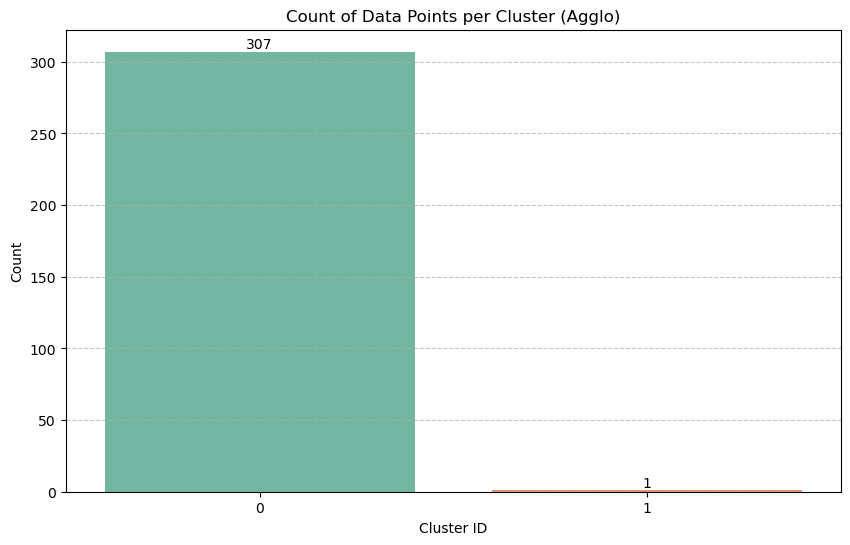

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

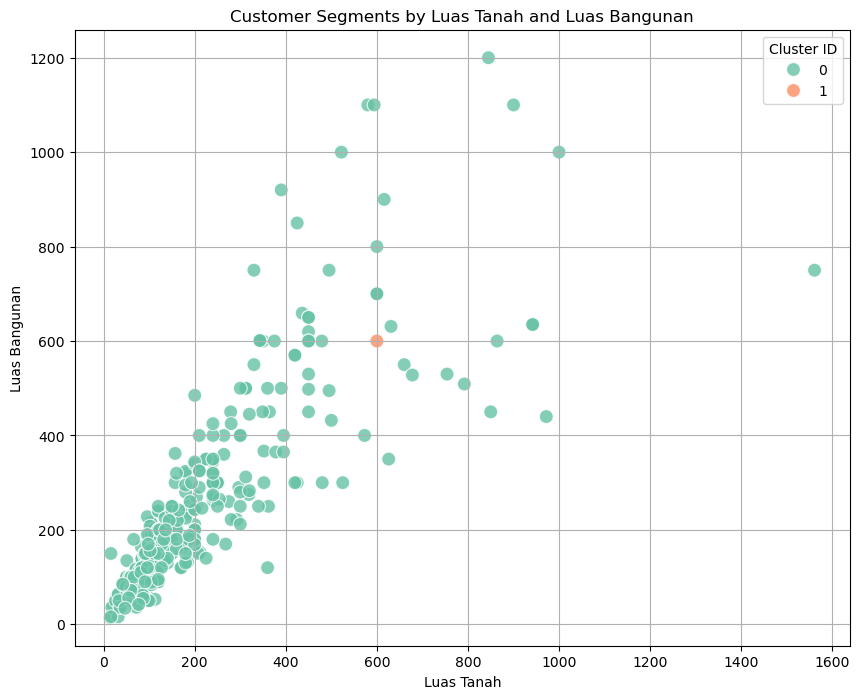

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Tanah', y='Luas Bangunan', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments by Luas Tanah and Luas Bangunan')
plt.xlabel('Luas Tanah')
plt.ylabel('Luas Bangunan')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [55]:
import plotly.express as px

# Define the columns for the 3D scatter plot
a_col = 'Luas Tanah'
b_col = 'Luas Bangunan'
c_col = 'Harga Penawaran'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=a_col,
                    y=b_col,
                    z=c_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Customers by Agglo Clusters')

fig.show()

## Statistical Summary for each cluster

In [63]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc).agg({
    'Luas Tanah': ['mean', 'std', 'min', 'max'],
    'Luas Bangunan': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar': ['mean', 'std', 'min', 'max'],
    'Jumlah Kamar Mandi': ['mean', 'std', 'min', 'max'],
    'Tingkat/Lantai': ['mean', 'std', 'min', 'max'],
    'Harga Penawaran': ['mean', 'std', 'min', 'max', 'count'],

    'Area Category': ['first', 'count'],
    'Nama Daerah': ['first', 'count'],
    'Terjual/Belum': ['first', 'count'],
    'Arah Hadap Rumah': ['first', 'count'],
    'Posisi Rumah': ['first', 'count'],
    'Lebar Jalan Depan Rumah': ['first', 'count'],
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

display(cluster_summary)


Luas Tanah                        Luas Bangunan                   \
               mean         std  min   max          mean         std  min   
cluster                                                                     
0        225.736156  201.019246   14  1561    265.602606  212.655015   14   
1        600.000000         NaN  600   600    600.000000         NaN  600   

              Jumlah Kamar                   Jumlah Kamar Mandi               \
          max         mean       std min max               mean      std min   
cluster                                                                        
0        1200     4.267101  1.639083   1  13           3.332248  1.62709   1   
1         600     7.000000       NaN   7   7           5.000000      NaN   5   

            Tingkat/Lantai                   Harga Penawaran                \
        max           mean       std min max            mean           std   
cluster                                                                      
0        13       1.843648  0.506478   1   4    4.708159e+09  6.351742e+09   
1         5       1.000000       NaN   1   1    9.900000e+10           NaN   

                                        Area Category       Nama Daerah        \
                 min          max count          mode count        mode count   
cluster                                                                         
0          160000000  58000000000   307             3   307          11   307   
1        99000000000  99000000000     1             3     1          30     1   

        Terjual/Belum       Arah Hadap Rumah       Posisi Rumah        \
                 mode count             mode count         mode count   
cluster                                                                 
0                   0   307                3   307            2   307   
1                   0     1                0     1            2     1   

        Lebar Jalan Depan Rumah        
                           mode count  
cluster                                
0                             0   307  
1                             0     1

Implikasi Manajerial Berdasarkan Hasil Clustering <br>
## **Cluster 0 (n=307) — Rumah Menengah, Variatif, Pasar Utama**

Profil Cluster: <br>
- Luas Tanah rata-rata ±225 m² (bervariasi dari 14–1561 m²).
- Luas Bangunan rata-rata ±265 m² (rentang 14–1200 m²).
- Jumlah kamar sekitar 4–5, kamar mandi ±3.
- Harga Penawaran relatif beragam — menunjukkan segmen pasar luas.
- Nama Daerah dominan di area kode 11 (kemungkinan area kota utama).
- Posisi rumah umumnya di posisi 2 (tengah/strategis).
- Arah rumah dan lebar jalan bervariasi.

Makna Bisnis: Mewakili pasar properti menengah dengan variasi luas, harga tinggi, dan pembeli beragam dari keluarga hingga investor.

Strategi Manajerial: <br>
- Fokus pada fleksibilitas penawaran: sediakan berbagai opsi luas tanah dan bangunan
- Promosi area strategis: tonjolkan keunggulan lokasi dan akses jalan karena faktor ini dominan di cluster ini.
- Gunakan pricing tiering: buat level harga menengah–atas untuk segmentasi internal (misal: Standard, Premium).
- Layanan tambahan: tawarkan renovasi ringan atau paket interior untuk meningkatkan daya tarik rumah lama.

Fokus KPI: Conversion rate listing → inquiry, Rata-rata harga jual per m², Tingkat keterisian stok listing (inventory turnover)

## **Cluster 1 (n=1) — Rumah Besar, Premium, Pasar Eksklusif**

Profil Cluster: <br>
- Luas Tanah dan Bangunan sama-sama 600 m² (tetap).
- Jumlah kamar 7, kamar mandi juga relatif banyak.
- Harga Penawaran tinggi dan stabil.
- Nama Daerah bernilai 30 (kemungkinan kawasan premium).
- Arah, posisi, dan lebar jalan menunjukkan properti besar di lingkungan elite.

Makna Bisnis:Mewakili segmen properti premium dengan rumah besar, spesifikasi tinggi, dan nilai transaksi tinggi.

Strategi Manajerial:
- Pendekatan personalisasi: gunakan private viewing atau tur eksklusif untuk calon pembeli.
- Brand positioning: tampilkan citra mewah — gunakan visual marketing berkualitas tinggi (drone, video cinematic).
- Kolaborasi dengan agen high-end: jangkau pembeli kelas atas melalui jaringan properti eksklusif.
- Opsi investasi jangka panjang: promosikan nilai kenaikan aset dan potensi sewa premium.

Fokus KPI: Nilai transaksi per properti, Return on Listing (ROI per agen), Customer satisfaction index (post-purchase experience)

## **Rekomendasi Umum**
Segmentasi Properti: <br>
- Cluster 0 --> Rumah menengah --> Diversifikasi stok & harga, perkuat promosi area strategis
- Cluster 1 --> Rumah premium --> Branding eksklusif, personalisasi layanan, kolaborasi agen elite

Strategi Pemasaran: <br>
- Digital Marketing (Cluster 0): iklan Google, marketplace properti (Rumah123, OLX, dll), promo potongan harga DP.
- High-End Marketing (Cluster 1): website premium, katalog properti mewah, kolaborasi dengan event real estate eksklusif.

Strategi Produk & Layanan: <br>
- Tawarkan paket pembiayaan fleksibel untuk cluster 0 (cicilan, KPR ringan).
- Siapkan layanan konsultasi pribadi untuk cluster 1 (custom design, renovasi, interior premium).

Monitoring: <br>
- Evaluasi ulang cluster setiap 6 bulan untuk melihat perubahan pola permintaan.
- Analisis potensi munculnya cluster baru jika data properti semakin banyak atau wilayah baru berkembang.